# Estimating the true mutual information

Here is a method for estimating the true mutual information for the multivariate gaussian. This is a 'good' estimator for this particular distribution and can serve as a benchmark for more general estimators. 

$$Y \sim \pi \text{ over } \{1,...,k\}$$  
$$X|Y=y \sim \mathcal{N}(\mu_y, \Sigma_y) \text{ over } \mathbb{R}^n$$

$$I(X, Y) = \sum_y \int \text{d}x^n p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right)
          = \mathbb{E}\left[\log\left(\frac{P(X|Y)}{\sum_{y'}p(X|y')p(y')}\right)\right]$$

Estimate $I$ by generating samples $(x^{(i)}, y^{(i)})$, $i=1,...,m$
$$\hat{I} \approx \frac{1}{m}\sum_{i=1}^{m}\log\left(\frac{p(x^{(i)}| y^{(i)})}{\sum_{y'}p(x^{(i)}| y')p(y')}\right)$$

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn
from numpy import random
from scipy.stats import multivariate_normal

In [5]:
def I_hat(pi, mus, Sigs, m):
    '''INPUT:
    pi : ndarray of shape (k,)
        k = number of classes
        pi[y] = P(Y = y)
    mus : ndarray of shape (k, n)
        mus[y] = mean vector for class y 
    Sigs : ndarray of shape (k, n, n)
        Sigs[y] = covariance matrix for class y
    m : integer
        m = number of samples
    OUTPUT:
    dict with contents
    'ys' : ndarray of shape (m,)
        'ys'[i] = ith sample of Y
    'xs' : ndarray of shape (m, n)
        'xs'[i] = ith sample of X
    'I' : ndarray of shape (m,)
        'I'[i] = estimate of I after ith sample
    '''
    k = np.size(pi)
    print('k = '+str(k))
    ys = random.choice(k, size=m, p=pi)
    print('calculated ys, first 5 = '+str(ys[:5]))
    xs = np.array([random.multivariate_normal(mus[y_i], Sigs[y_i]) 
                   for y_i in ys])
    print('calculated xs, first 5 = '+str(xs[:5]))
    log_p_xi_g_yi = np.array([multivariate_normal.logpdf(x_i, mus[y_i], Sigs[y_i]) 
                              for x_i, y_i in zip(xs, ys)])
    print('calculated log(p(x_i | y_i)), first 5 = '+str(log_p_xi_g_yi[:5]))
    log_p_xi = np.log(np.array([np.sum([multivariate_normal.pdf(x_i, mus[y], Sigs[y])*pi[y] 
                                        for y in np.arange(k)]) 
                                for x_i in xs]))
    print('calculated log(p(x_i)), first 5 = '+str(log_p_xi[:5]))
    I_ = log_p_xi_g_yi - log_p_xi
    I = np.cumsum(I_)/(np.arange(m)+1)
    print('calculated I, first 5 steps = '+str(I[:5]))
    outputs = {'ys': ys, 'xs': xs, 'I': I}
    return outputs

In [14]:
pi = np.array([0.8, 0.2])
mus = np.array([[0., 0.],
                [3., 4.]])
Sigs = np.array([[[1.,0.],
                  [0.,1.]],
                 [[0.5,0.],
                  [0.,1.]]])
m = 10000

In [15]:
outputs = I_hat(pi, mus, Sigs, m)

k = 2
calculated ys, first 5 = [0 0 0 0 1]
calculated xs, first 5 = [[ 1.5878123  -0.16336965]
 [-1.96578426  0.49333004]
 [-0.68732429  0.06817723]
 [-0.11747296 -2.05566969]
 [ 3.15565996  3.94459933]]
calculated log(p(x_i | y_i)), first 5 = [-3.11179585 -3.89171821 -2.07640847 -3.95766594 -1.51706812]
calculated log(p(x_i)), first 5 = [-3.33490977 -4.11486176 -2.29955202 -4.18080949 -3.12649768]
calculated I, first 5 steps = [ 0.22311393  0.22312874  0.22313368  0.22313615  0.50039483]


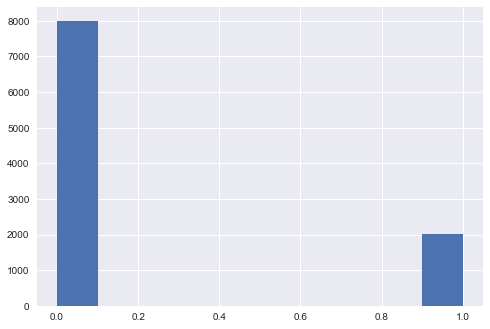

In [16]:
plt.hist(outputs['ys']);

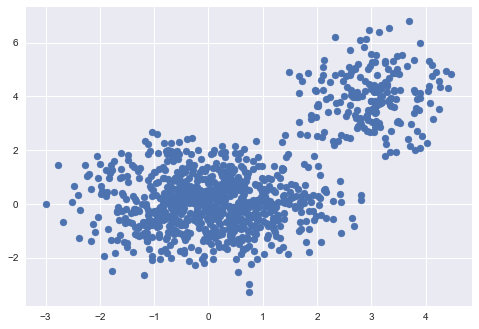

In [17]:
plt.scatter(outputs['xs'][:1000,0], outputs['xs'][:1000,1]);

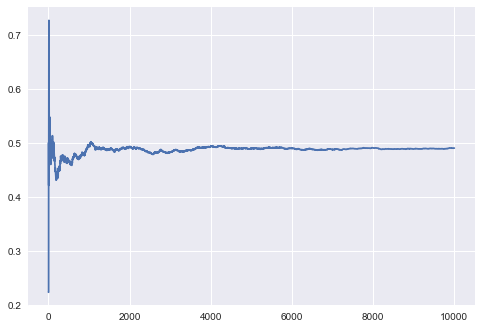

In [18]:
plt.plot(outputs['I'])